<a href="https://colab.research.google.com/github/Ethan-Jeong/test_deeplearning/blob/master/practice_tensorflow_wine.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from sklearn import datasets

In [2]:
wine = datasets.load_wine()
wine.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])

In [3]:
x_data = wine['data']
y_data = wine['target']
x_data.shape , y_data.shape

((178, 13), (178,))

In [4]:
import numpy as np

In [5]:
np.unique(y_data)

array([0, 1, 2])

In [6]:
import pandas as pd

In [7]:
df_wine = pd.DataFrame(wine.data)
df_wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       178 non-null    float64
 1   1       178 non-null    float64
 2   2       178 non-null    float64
 3   3       178 non-null    float64
 4   4       178 non-null    float64
 5   5       178 non-null    float64
 6   6       178 non-null    float64
 7   7       178 non-null    float64
 8   8       178 non-null    float64
 9   9       178 non-null    float64
 10  10      178 non-null    float64
 11  11      178 non-null    float64
 12  12      178 non-null    float64
dtypes: float64(13)
memory usage: 18.2 KB


In [8]:
import sqlite3
connect = sqlite3.connect('./db.sqlite3')
df_wine.to_sql('wine_resource',connect,if_exists='append',index=False)

In [9]:
df_load = pd.read_sql_query('select * from wine_resource', connect)
df_load.head(4)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0


In [10]:
x_data = df_load.to_numpy()
x_data.shape

(178, 13)

In [11]:
y_data = wine.target
y_data , np.unique(y_data)

(array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2]), array([0, 1, 2]))

In [12]:
x_data , x_data.shape

(array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
         1.065e+03],
        [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
         1.050e+03],
        [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
         1.185e+03],
        ...,
        [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
         8.350e+02],
        [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
         8.400e+02],
        [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
         5.600e+02]]), (178, 13))

In [13]:
import tensorflow as tf

In [14]:
model = tf.keras.Sequential()

In [15]:
model.add(tf.keras.Input(shape=(13,))) # input layer
model.add(tf.keras.layers.Dense(64,activation='relu')) # hidden layer
model.add(tf.keras.layers.Dense(32,activation='relu')) # hidden layer
model.add(tf.keras.layers.Dense(3,activation='softmax'))

In [16]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['acc'])

In [17]:
hist = model.fit( x_data , y_data , epochs=50 , validation_split=0.3 )

Epoch 1/50
4/4 [==============================] - 1s 65ms/step - loss: 51.3742 - acc: 0.5242 - val_loss: 47.4471 - val_acc: 0.0185
Epoch 2/50
4/4 [==============================] - 0s 11ms/step - loss: 12.5378 - acc: 0.4194 - val_loss: 57.4289 - val_acc: 0.0000e+00
Epoch 3/50
4/4 [==============================] - 0s 10ms/step - loss: 21.2420 - acc: 0.4758 - val_loss: 56.0411 - val_acc: 0.0000e+00
Epoch 4/50
4/4 [==============================] - 0s 10ms/step - loss: 13.0051 - acc: 0.4758 - val_loss: 49.5143 - val_acc: 0.0000e+00
Epoch 5/50
4/4 [==============================] - 0s 10ms/step - loss: 5.2064 - acc: 0.5081 - val_loss: 54.5023 - val_acc: 0.1111
Epoch 6/50
4/4 [==============================] - 0s 10ms/step - loss: 2.4015 - acc: 0.6774 - val_loss: 49.5269 - val_acc: 0.0370
Epoch 7/50
4/4 [==============================] - 0s 10ms/step - loss: 3.5316 - acc: 0.5645 - val_loss: 49.1004 - val_acc: 0.0741
Epoch 8/50
4/4 [==============================] - 0s 11ms/step - loss: 0.9

In [18]:
model.evaluate(x_data ,y_data)

6/6 [==============================] - 0s 2ms/step - loss: 15.4151 - acc: 0.6517


[15.415063858032227, 0.6516854166984558]

In [19]:
x_data[25],y_data[25]

(array([1.305e+01, 2.050e+00, 3.220e+00, 2.500e+01, 1.240e+02, 2.630e+00,
        2.680e+00, 4.700e-01, 1.920e+00, 3.580e+00, 1.130e+00, 3.200e+00,
        8.300e+02]), 0)

In [20]:
hist.history.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

In [21]:
import matplotlib.pyplot as plt

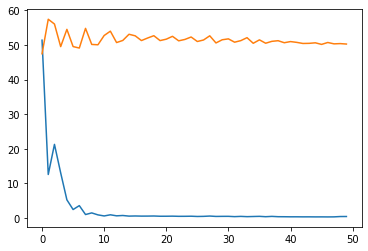

In [22]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.show()

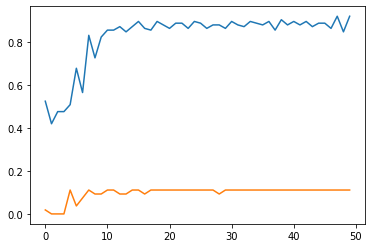

In [23]:
plt.plot(hist.history['acc'])
plt.plot(hist.history['val_acc'])
plt.show()

In [24]:
pred = model.predict([[1.305e+01, 2.050e+00, 3.220e+00, 2.500e+01, 1.240e+02, 2.630e+00,
        2.680e+00, 4.700e-01, 1.920e+00, 3.580e+00, 1.130e+00, 3.200e+00,
        8.300e+02]])
pred , np.argmax(pred)

(array([[2.1641058e-01, 7.8358948e-01, 1.1044218e-32]], dtype=float32), 1)